This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

# we are working with PBMCs so lets store some marker genes
marker_genes = ['CD14', 'LYZ', 'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'GNLY', 'NKG7',
                'MS4A1', 'IL7R', 'CCR7', 'S100A4', 'CD8A', 'PPBP']

marker_genes_dict = {
    'CD14 Mono': ['CD14', 'LYZ'],
    'CD16 Mono': ['FCGR3A', 'MS4A7'],
    'Dendritic': ['FCER1A', 'CST3'],
    'NK': ['GNLY', 'NKG7'],
    'B Cell': ['MS4A1', 'CD79A'],
    'CD4 T': ['IL7R'],
    'CD4 T Naive': ['CCR7'],
    'CD4 T Memory': ['S100A4'],
    'CD8 T': ['CD8A'],
    'Megakaryocytes': ['PPBP']
}


scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.8.1 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


## Open files

In [2]:
data_path = f"{os.getcwd()}/../../data/single_cell_data/kang_rybakov/"

# file downloaded from SeuratData then converted to h5ad 

in_file = f"{data_path}/ifnb.h5ad"
results_file = f"{data_path}/ifnb_processed.h5ad"

adata = sc.read_h5ad(in_file)
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`



In [3]:
adata.obs.loc["AAACATACATTTCC.1"] # "CD14 Mono"

orig.ident            IMMUNE_CTRL
nCount_RNA                 3017.0
nFeature_RNA                  877
stim                         CTRL
seurat_annotations              0
Name: AAACATACATTTCC.1, dtype: object

In [4]:
adata.obs.loc["AAACATACCTGGTA.1"] # "pDC"

orig.ident            IMMUNE_CTRL
nCount_RNA                 3156.0
nFeature_RNA                 1109
stim                         CTRL
seurat_annotations             11
Name: AAACATACCTGGTA.1, dtype: object

In [5]:
adata.obs.loc["AAACATACGATGAA.1"] # "CD4 Memory T"

orig.ident            IMMUNE_CTRL
nCount_RNA                 1868.0
nFeature_RNA                  634
stim                         CTRL
seurat_annotations              2
Name: AAACATACGATGAA.1, dtype: object

In [6]:
adata.obs.loc["AAACATACTGCGTA.1"] # "T Activated"

orig.ident            IMMUNE_CTRL
nCount_RNA                 2747.0
nFeature_RNA                  980
stim                         CTRL
seurat_annotations              6
Name: AAACATACTGCGTA.1, dtype: object

In [7]:
adata.obs.loc["AAACATACTGCTGA.1"] # "CD4 Naive T"

orig.ident            IMMUNE_CTRL
nCount_RNA                 1341.0
nFeature_RNA                  581
stim                         CTRL
seurat_annotations              1
Name: AAACATACTGCTGA.1, dtype: object

In [8]:
adata.obs.loc["AAACATTGAGTGTC.1"] # "CD8 T"

orig.ident            IMMUNE_CTRL
nCount_RNA                 2155.0
nFeature_RNA                  880
stim                         CTRL
seurat_annotations              5
Name: AAACATTGAGTGTC.1, dtype: object

In [9]:
adata.obs.loc["AAACGCACAGTACC.1"] # "Mk"

orig.ident            IMMUNE_CTRL
nCount_RNA                 1343.0
nFeature_RNA                  560
stim                         CTRL
seurat_annotations             10
Name: AAACGCACAGTACC.1, dtype: object

In [10]:
adata.obs.loc["AACCACGAAGTGTC.1"] # "B"

orig.ident            IMMUNE_CTRL
nCount_RNA                 1152.0
nFeature_RNA                  601
stim                         CTRL
seurat_annotations              4
Name: AACCACGAAGTGTC.1, dtype: object

In [11]:
adata.obs.loc["AAGTTATGAAGATG.1"] # "DC"

orig.ident            IMMUNE_CTRL
nCount_RNA                 5890.0
nFeature_RNA                 1570
stim                         CTRL
seurat_annotations              8
Name: AAGTTATGAAGATG.1, dtype: object

In [12]:
adata.obs.loc["AAGCCATGTGTGGT.1"] # "CD16 Mono"

orig.ident            IMMUNE_CTRL
nCount_RNA                 1740.0
nFeature_RNA                  621
stim                         CTRL
seurat_annotations              3
Name: AAGCCATGTGTGGT.1, dtype: object

In [13]:
adata.obs.loc["ACAGTGTGCCGCTT.1"] # "B Activated"

orig.ident            IMMUNE_CTRL
nCount_RNA                 1933.0
nFeature_RNA                  775
stim                         CTRL
seurat_annotations              9
Name: ACAGTGTGCCGCTT.1, dtype: object

In [14]:
adata.obs.loc["AATGGCTGTGGTTG.1"] # "Eryth"

orig.ident            IMMUNE_CTRL
nCount_RNA                 5288.0
nFeature_RNA                  630
stim                         CTRL
seurat_annotations             12
Name: AATGGCTGTGGTTG.1, dtype: object

In [15]:
adata.obs.loc["CGCTACTGCTGTGA.1"] # "NK"

orig.ident            IMMUNE_CTRL
nCount_RNA                 1306.0
nFeature_RNA                  660
stim                         CTRL
seurat_annotations              7
Name: CGCTACTGCTGTGA.1, dtype: object

In [16]:
cell_dict = {'CD14_Mono': [0], 'CD4_Naive_T': [1], 'CD4_Mem_T': [2], 'CD16_Mono': [3], 
'B': [4], 'CD8_T': [5], 'T_Act': [6], 'NK': [7], 'DC': [8], 
'B_Act': [9], 'Mk': [10], 'pDC': [11], 'Eryth': [12]}

pd.Series(adata.obs.seurat_annotations).isin([0])

AAACATACATTTCC.1     True
AAACATACCAGAAA.1     True
AAACATACCTCGCT.1     True
AAACATACCTGGTA.1    False
AAACATACGATGAA.1    False
                    ...  
TTTGCATGAACGAA.1    False
TTTGCATGACGTAC.1    False
TTTGCATGCCTGTC.1    False
TTTGCATGCTAAGC.1    False
TTTGCATGGGACGA.1    False
Name: seurat_annotations, Length: 13999, dtype: bool

In [17]:
# get the proper names for the cell type predictions
cell_dict = {'CD14_Mono': [0], 'CD4_Naive_T': [1], 'CD4_Mem_T': [2], 'CD16_Mono': [3], 
'B': [4], 'CD8_T': [5], 'T_Act': [6], 'NK': [7], 'DC': [8], 
'B_Act': [9], 'Mk': [10], 'pDC': [11], 'Eryth': [12]}

# Initialize empty column in cell metadata
adata.obs['seurat_names'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.seurat_annotations).isin(cell_dict[i])
    adata.obs.loc[ind,'seurat_names'] = i

adata.obs.seurat_names.value_counts()

CD14_Mono      4362
CD4_Naive_T    2504
CD4_Mem_T      1762
CD16_Mono      1044
B               978
CD8_T           814
T_Act           633
NK              619
DC              472
B_Act           388
Mk              236
pDC             132
Eryth            55
Name: seurat_names, dtype: int64

In [18]:
# merge them
cell_dict = {'CD14_Mono': [0], 'CD4_Naive_T': [1], 'CD4_Mem_T': [2], 'CD16_Mono': [3], 
'B': [4,9], 'CD8_T': [5], 'T_Act': [6], 'NK': [7], 'DC': [8, 11], 
'Mk': [10], 'Eryth': [12]}

# Initialize empty column in cell metadata
adata.obs['seurat_names_merged'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.seurat_annotations).isin(cell_dict[i])
    adata.obs.loc[ind,'seurat_names_merged'] = i

adata.obs.seurat_names_merged.value_counts()

CD14_Mono      4362
CD4_Naive_T    2504
CD4_Mem_T      1762
B              1366
CD16_Mono      1044
CD8_T           814
T_Act           633
NK              619
DC              604
Mk              236
Eryth            55
Name: seurat_names_merged, dtype: int64

In [19]:
# annotate with the sample ID
# sample IDs are taken from Kang etal.
# https://github.com/yelabucsf/demuxlet_paper_code/tree/master/fig2
# this data is from a run of demuxlet, I didnt run it, but I am taking their results from the paper

# well 1 and well 2 have minimal overlap (4 patients in each)
# well 3 is a mixture of well 1 and well 2

ctrl_file = f"{data_path}/ye1.ctrl.8.10.sm.best.tsv"
stim_file = f"{data_path}/ye2.stim.8.10.sm.best.tsv"

ctrl_df = pd.read_csv(ctrl_file, sep="\t")
stim_df = pd.read_csv(stim_file, sep="\t")

sample_barcode_df = pd.concat([ctrl_df, stim_df])
sample_barcode_df["stim"] = ["CTRL"]*ctrl_df.shape[0] + ["STIM"]*stim_df.shape[0]
sample_barcode_df['BARCODE'] = sample_barcode_df['BARCODE']+sample_barcode_df['stim']

sample_barcode_df = sample_barcode_df[["BARCODE", "SNG.1ST"]]
sample_barcode_df['BARCODE'] = sample_barcode_df['BARCODE'].str.replace('-','.')
sample_barcode_df = sample_barcode_df.set_index('BARCODE')
sample_barcode_df = sample_barcode_df.rename(columns={"SNG.1ST": "sample_id"})

In [20]:
sample_barcode_df

sample_id
BARCODE                        
AAACATACAATGCC.1CTRL        107
AAACATACATTTCC.1CTRL       1016
AAACATACCAGAAA.1CTRL       1256
AAACATACCAGCTA.1CTRL       1256
AAACATACCATGCA.1CTRL       1488
...                         ...
TTTGCATGCTAAGC.1STIM        107
TTTGCATGGGACGA.1STIM       1488
TTTGCATGGTGAGG.1STIM       1488
TTTGCATGGTTTGG.1STIM       1244
TTTGCATGTCTTAC.1STIM       1016

[29065 rows x 1 columns]

In [21]:
ctrl_df["SNG.1ST"].value_counts()

1015    3138
1256    2451
1488    2376
1244    2250
1016    2180
101     1027
107      645
1039     552
Name: SNG.1ST, dtype: int64

In [22]:
stim_df["SNG.1ST"].value_counts()

1488    2914
1015    2703
1256    2275
1016    1998
1244    1755
101     1363
1039     797
107      641
Name: SNG.1ST, dtype: int64

In [23]:
# make cell type specific marker annotation


# Initialize empty column in cell metadata
adata.var['gene_annot'] = adata.var_names


## Preprocessing

In [24]:
# lets see whats in adata
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  stim  \
AAACATACATTTCC.1  IMMUNE_CTRL      3017.0           877  CTRL   
AAACATACCAGAAA.1  IMMUNE_CTRL      2481.0           713  CTRL   
AAACATACCTCGCT.1  IMMUNE_CTRL      3420.0           850  CTRL   
AAACATACCTGGTA.1  IMMUNE_CTRL      3156.0          1109  CTRL   
AAACATACGATGAA.1  IMMUNE_CTRL      1868.0           634  CTRL   
...                       ...         ...           ...   ...   
TTTGCATGAACGAA.1  IMMUNE_STIM      5577.0          1237  STIM   
TTTGCATGACGTAC.1  IMMUNE_STIM      1364.0           536  STIM   
TTTGCATGCCTGTC.1  IMMUNE_STIM      2114.0           817  STIM   
TTTGCATGCTAAGC.1  IMMUNE_STIM      1522.0           523  STIM   
TTTGCATGGGACGA.1  IMMUNE_STIM      1143.0           503  STIM   

                  seurat_annotations seurat_names seurat_names_merged  
AAACATACATTTCC.1                   0    CD14_Mono           CD14_Mono  
AAACATACCAGAAA.1                   0    CD14_Mono           CD14_Mono  
AAACATACCTCGCT.1                   0    CD14_Mono           CD14_Mono  
AAACATACCTGGTA.1                  11          pDC                  DC  
AAACATACGATGAA.1                   2    CD4_Mem_T           CD4_Mem_T  
...                              ...          ...                 ...  
TTTGCATGAACGAA.1                   8           DC                  DC  
TTTGCATGACGTAC.1                   2    CD4_Mem_T           CD4_Mem_T  
TTTGCATGCCTGTC.1                   4            B                   B  
TTTGCATGCTAAGC.1                   1  CD4_Naive_T         CD4_Naive_T  
TTTGCATGGGACGA.1                   1  CD4_Naive_T         CD4_Naive_T  

[13999 rows x 7 columns]

In [25]:
# now lets add the sample ids to adata
adata.obs['BARCODE'] = adata.obs.index
adata.obs['BARCODE'] = adata.obs['BARCODE'].str.replace('11','1') # seurat made it 11 instead of delineating CTRL vs STIM
adata.obs['BARCODE'] = adata.obs['BARCODE'].astype(str)  + adata.obs['stim'].astype(str)

# then order sample_barcode_df in the same way
sample_barcode_df = sample_barcode_df.loc[adata.obs['BARCODE']]
adata.obs['sample_id'] = sample_barcode_df["sample_id"].tolist()

adata.obs

orig.ident  nCount_RNA  nFeature_RNA  stim  \
AAACATACATTTCC.1  IMMUNE_CTRL      3017.0           877  CTRL   
AAACATACCAGAAA.1  IMMUNE_CTRL      2481.0           713  CTRL   
AAACATACCTCGCT.1  IMMUNE_CTRL      3420.0           850  CTRL   
AAACATACCTGGTA.1  IMMUNE_CTRL      3156.0          1109  CTRL   
AAACATACGATGAA.1  IMMUNE_CTRL      1868.0           634  CTRL   
...                       ...         ...           ...   ...   
TTTGCATGAACGAA.1  IMMUNE_STIM      5577.0          1237  STIM   
TTTGCATGACGTAC.1  IMMUNE_STIM      1364.0           536  STIM   
TTTGCATGCCTGTC.1  IMMUNE_STIM      2114.0           817  STIM   
TTTGCATGCTAAGC.1  IMMUNE_STIM      1522.0           523  STIM   
TTTGCATGGGACGA.1  IMMUNE_STIM      1143.0           503  STIM   

                  seurat_annotations seurat_names seurat_names_merged  \
AAACATACATTTCC.1                   0    CD14_Mono           CD14_Mono   
AAACATACCAGAAA.1                   0    CD14_Mono           CD14_Mono   
AAACATACCTCGCT.1                   0    CD14_Mono           CD14_Mono   
AAACATACCTGGTA.1                  11          pDC                  DC   
AAACATACGATGAA.1                   2    CD4_Mem_T           CD4_Mem_T   
...                              ...          ...                 ...   
TTTGCATGAACGAA.1                   8           DC                  DC   
TTTGCATGACGTAC.1                   2    CD4_Mem_T           CD4_Mem_T   
TTTGCATGCCTGTC.1                   4            B                   B   
TTTGCATGCTAAGC.1                   1  CD4_Naive_T         CD4_Naive_T   
TTTGCATGGGACGA.1                   1  CD4_Naive_T         CD4_Naive_T   

                               BARCODE  sample_id  
AAACATACATTTCC.1  AAACATACATTTCC.1CTRL       1016  
AAACATACCAGAAA.1  AAACATACCAGAAA.1CTRL       1256  
AAACATACCTCGCT.1  AAACATACCTCGCT.1CTRL       1256  
AAACATACCTGGTA.1  AAACATACCTGGTA.1CTRL       1039  
AAACATACGATGAA.1  AAACATACGATGAA.1CTRL       1488  
...                                ...        ...  
TTTGCATGAACGAA.1  TTTGCATGAACGAA.1STIM       1244  
TTTGCATGACGTAC.1  TTTGCATGACGTAC.1STIM       1488  
TTTGCATGCCTGTC.1  TTTGCATGCCTGTC.1STIM       1256  
TTTGCATGCTAAGC.1  TTTGCATGCTAAGC.1STIM        107  
TTTGCATGGGACGA.1  TTTGCATGGGACGA.1STIM       1488  

[13999 rows x 9 columns]

In [26]:
# make sure we aren't mismatched
check_empty = [i for i, j in zip(sample_barcode_df.index.to_list(), adata.obs['BARCODE']) if i != j]
check_empty

[]

In [27]:
# filter out Eryth
adata = adata[np.where(adata.obs.seurat_names_merged != "Eryth")]
adata.obs.seurat_names_merged.value_counts()

CD14_Mono      4362
CD4_Naive_T    2504
CD4_Mem_T      1762
B              1366
CD16_Mono      1044
CD8_T           814
T_Act           633
NK              619
DC              604
Mk              236
Name: seurat_names_merged, dtype: int64

/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


    finished (0:00:00)


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


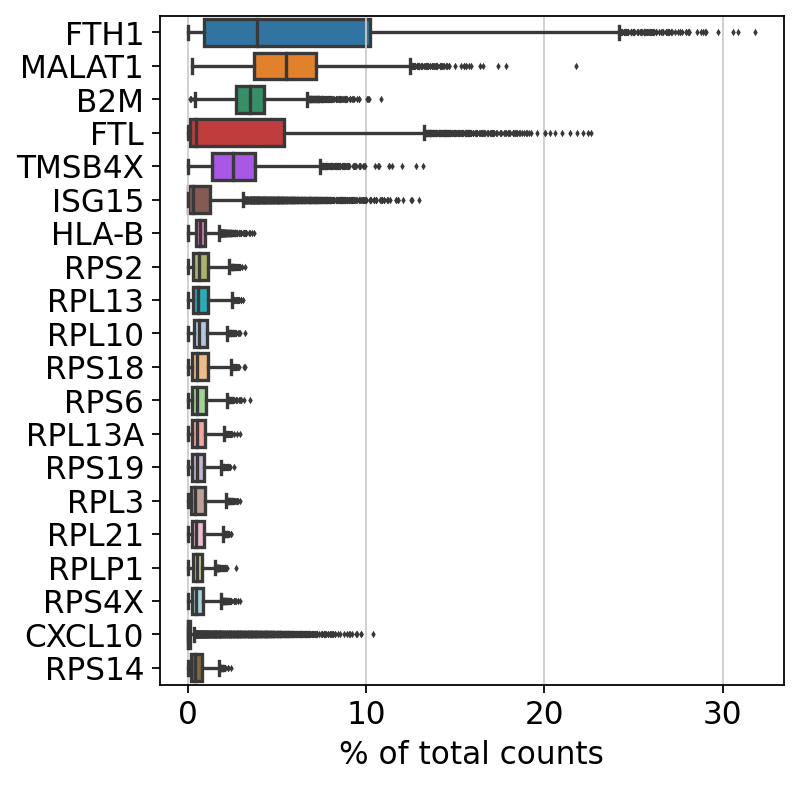

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [29]:
# filter out cells with less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=5)


filtered out 601 genes that are detected in less than 5 cells


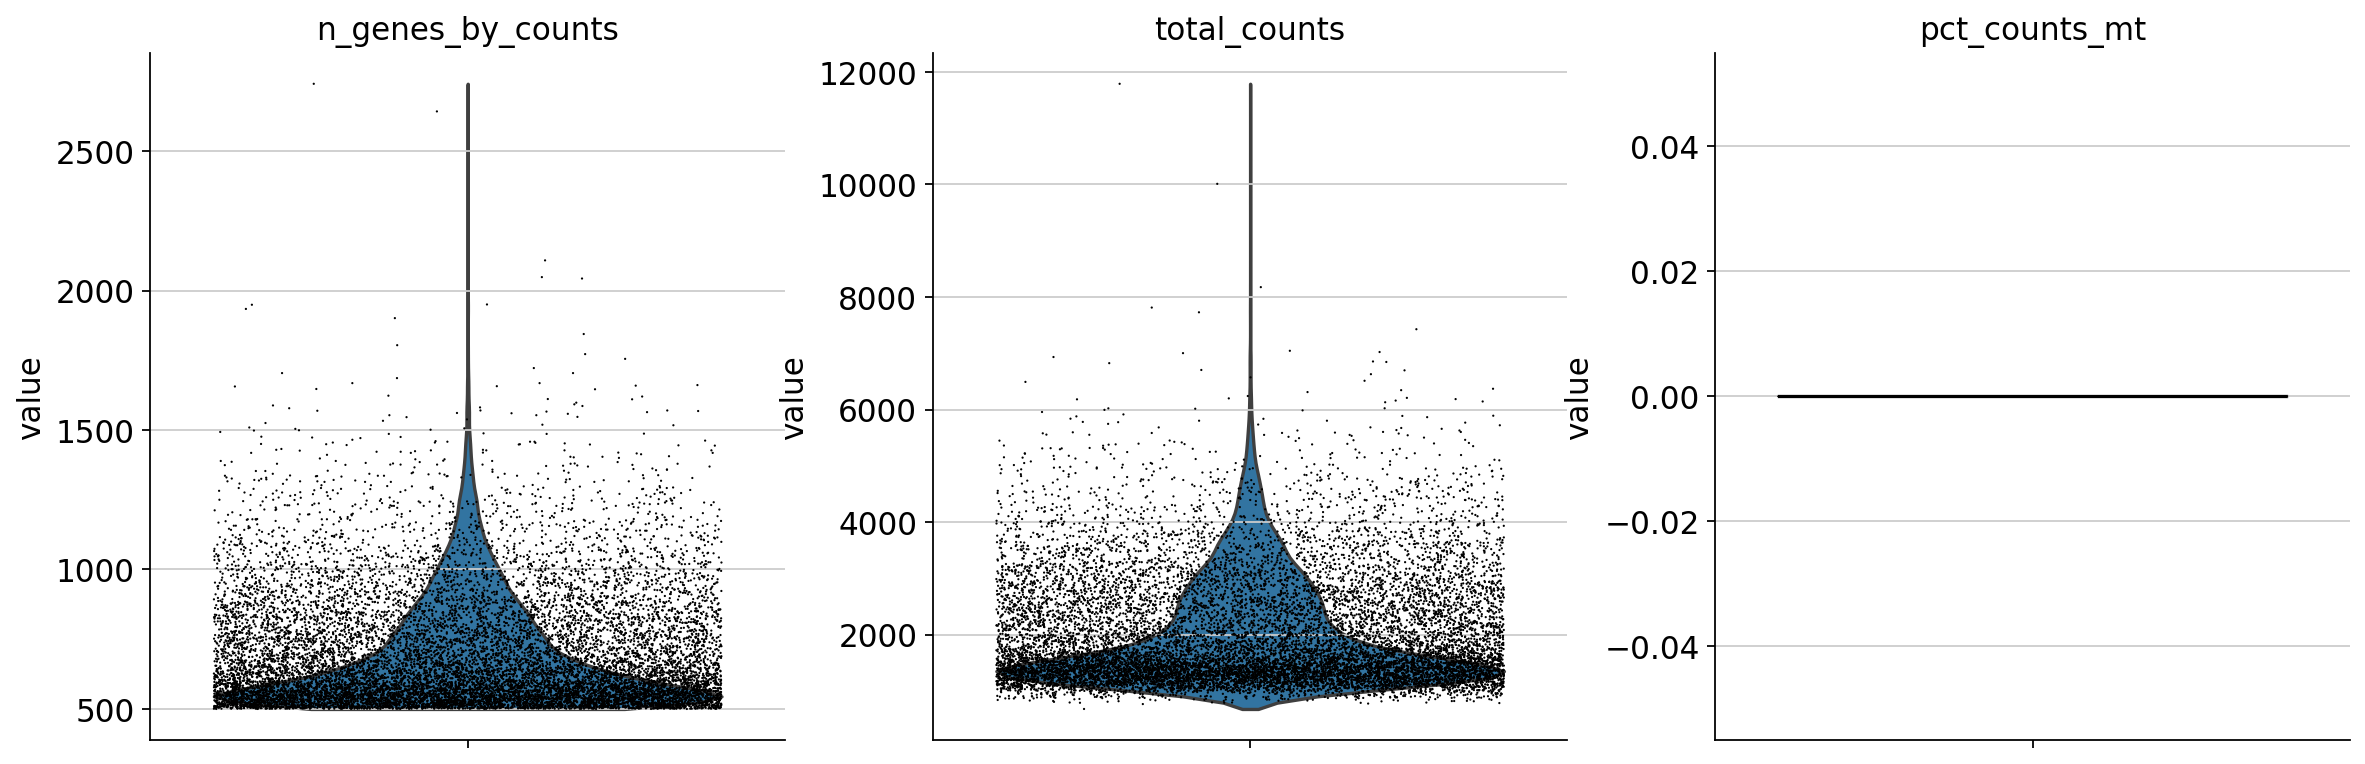

In [30]:
# remove genes with high mitochondrial content
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

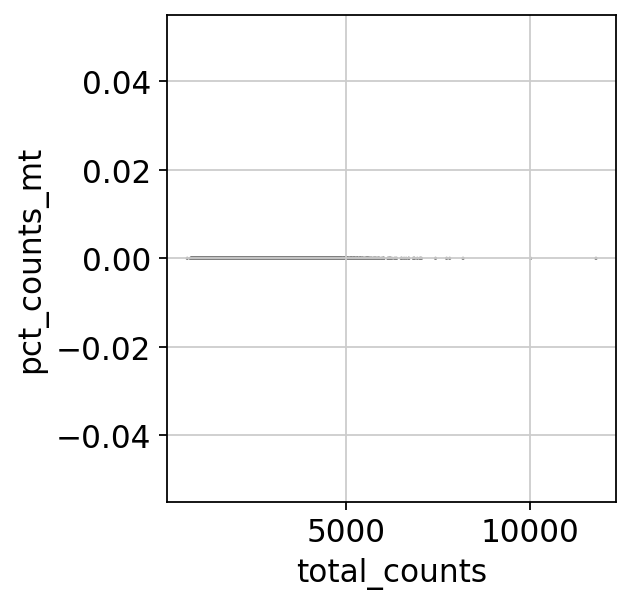

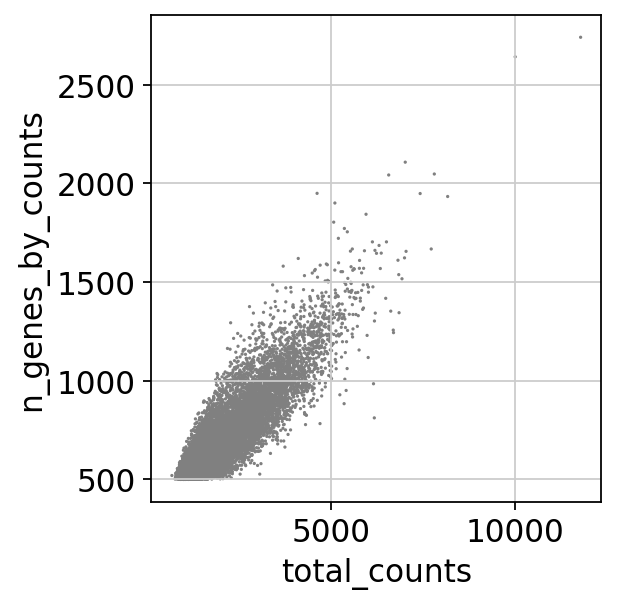

In [35]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [36]:
# slice the data based on the plots from above
# remove cells with more than 2500 genes
# remove cells with more than 5% MTgenes
adata = adata[adata.obs.n_genes_by_counts < 2000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [37]:
results_file

'/beevol/home/davidson/checkouts/sc_bulk_ood/sc_preprocessing/0_qc_notebooks/../../data/single_cell_data/kang_rybakov//ifnb_processed.h5ad'

In [38]:
# write it out before normalization
adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
del adata.raw
adata.write(results_file)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


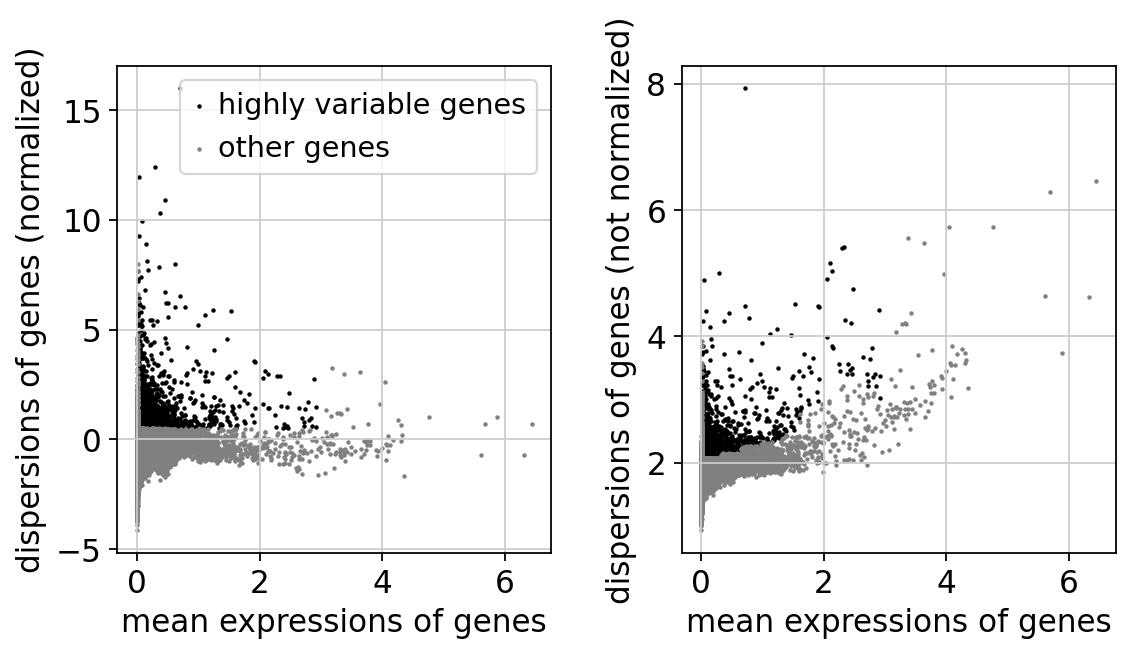

In [39]:
# normalize to 10K counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
adata.raw = adata


In [40]:
# now process the counts further for doing DE 
# analysis and the cell clustering
adata = adata[:, adata.var.highly_variable]

# regress out the signal
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

# scale the genes
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:33)


## PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


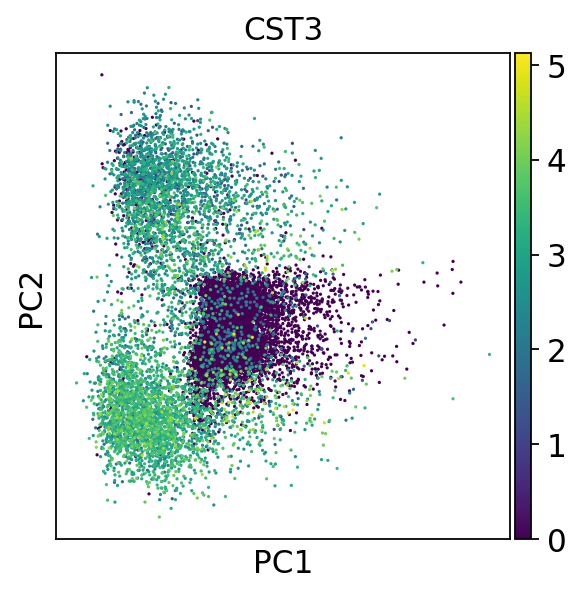

In [41]:
sc.tl.pca(adata, n_comps=50)
sc.pl.pca(adata, color='CST3')


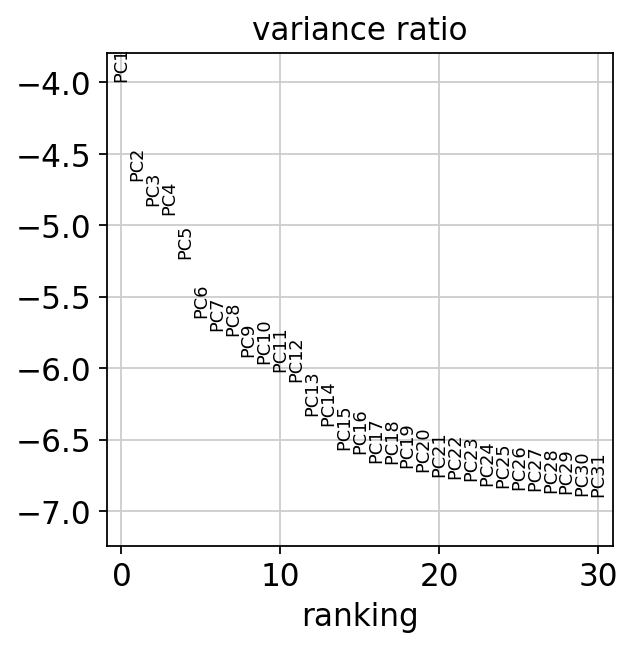

In [42]:
sc.pl.pca_variance_ratio(adata, log=True)


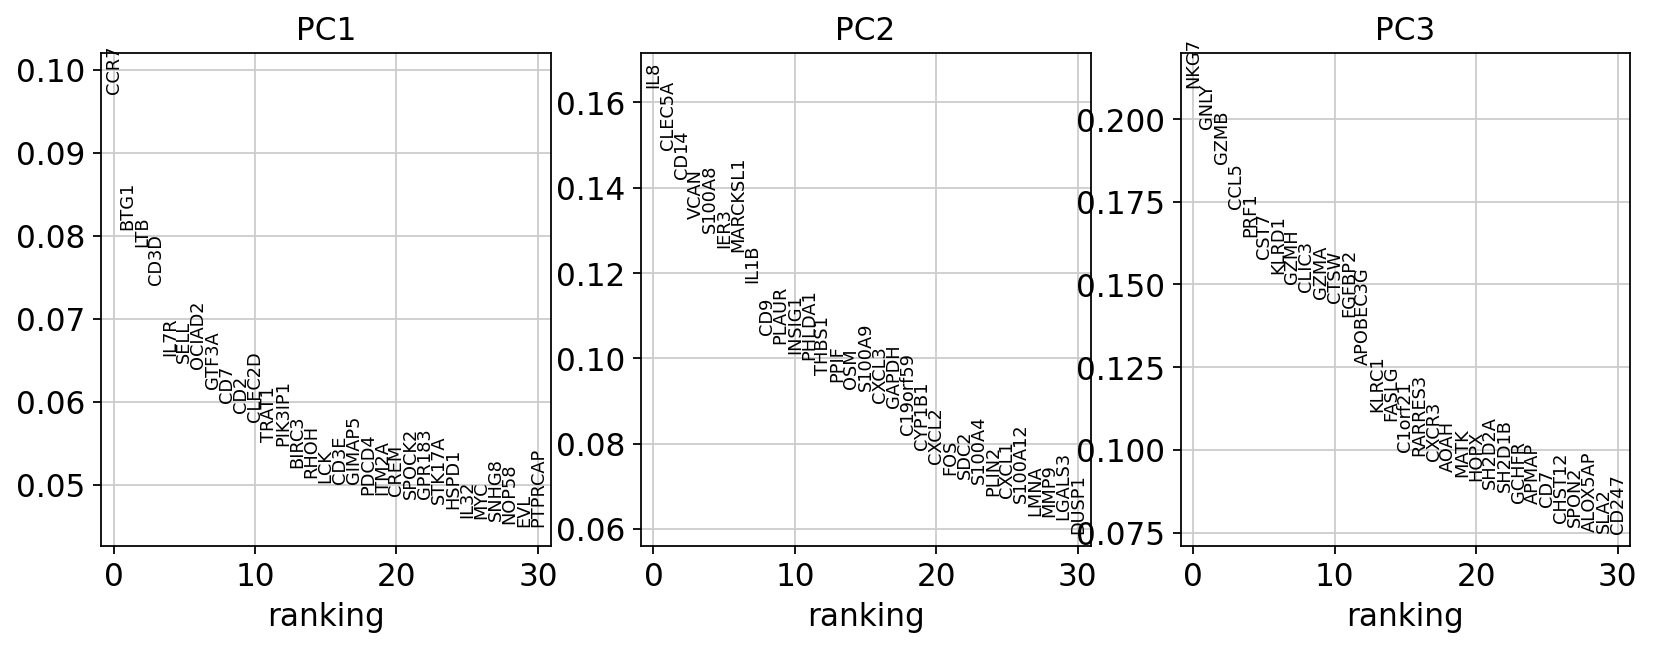

In [43]:
sc.pl.pca_loadings(adata, include_lowest=False)


## Compute and embed neighborhood graph

In [44]:
# valculate neighborhood graph
sc.pp.neighbors(adata)

# make umap
sc.tl.umap(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50


OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


## Cluster the neighborhood graph

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


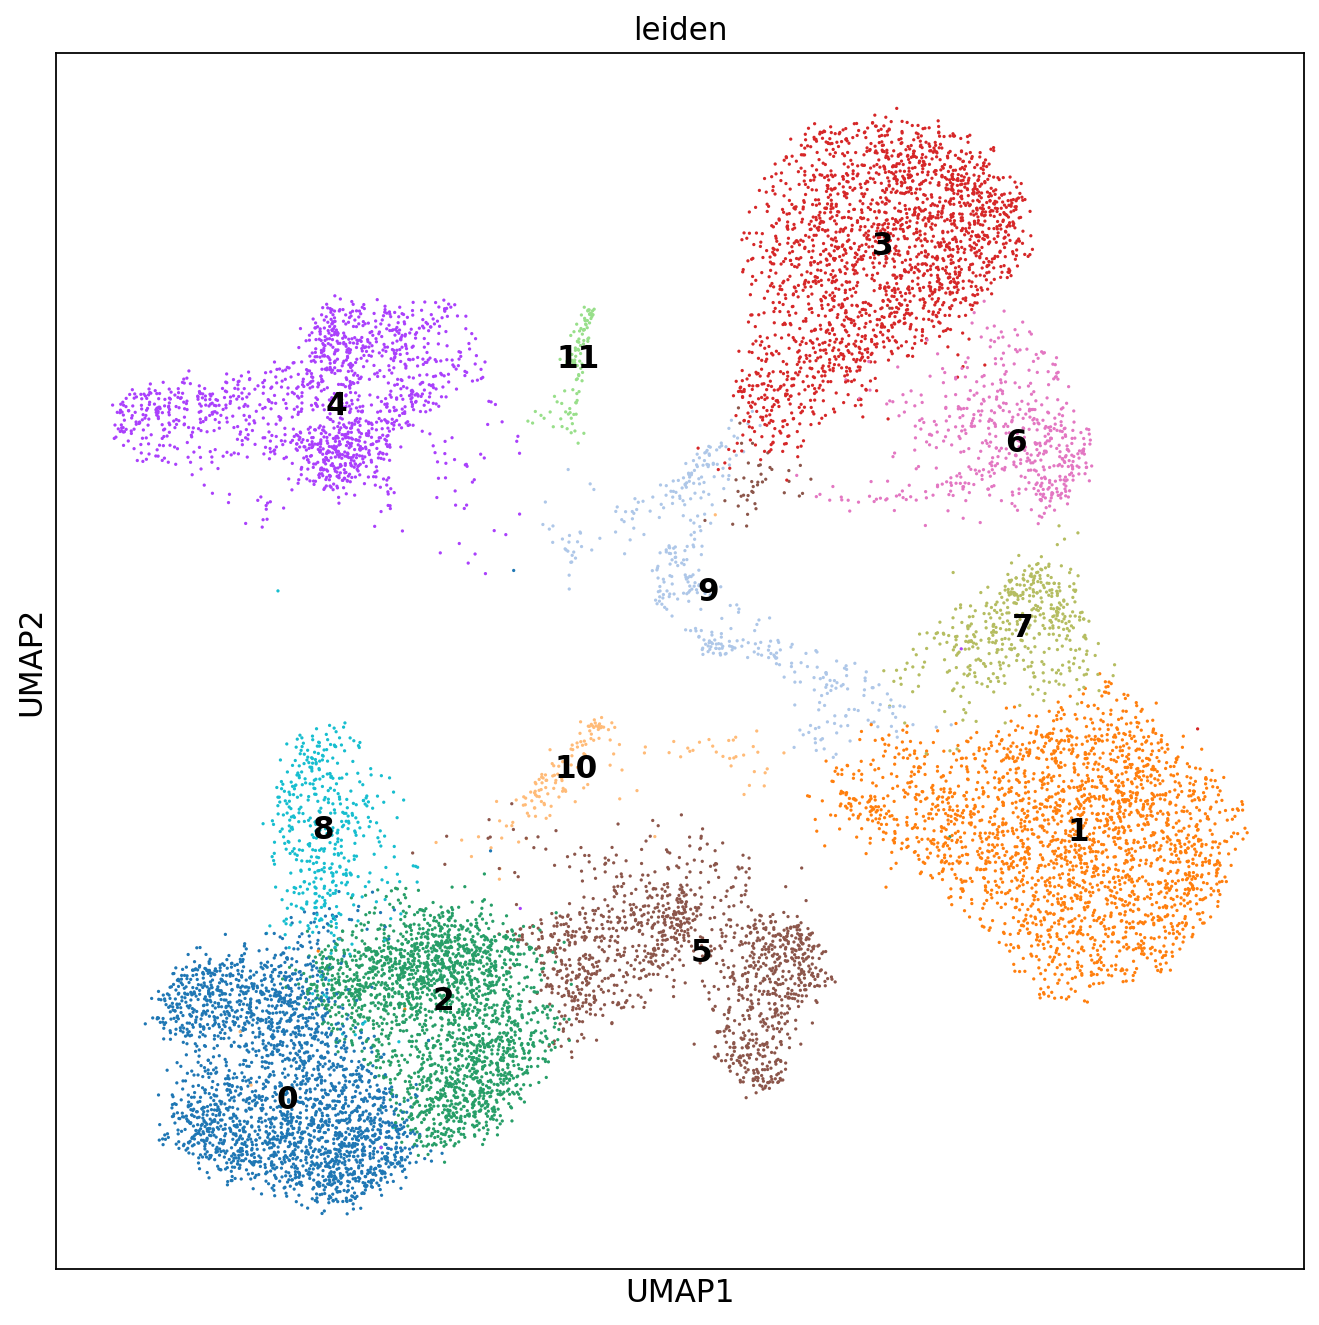

In [45]:
# lets use Leiden clustering
sc.tl.leiden(adata, resolution=0.7)
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data')



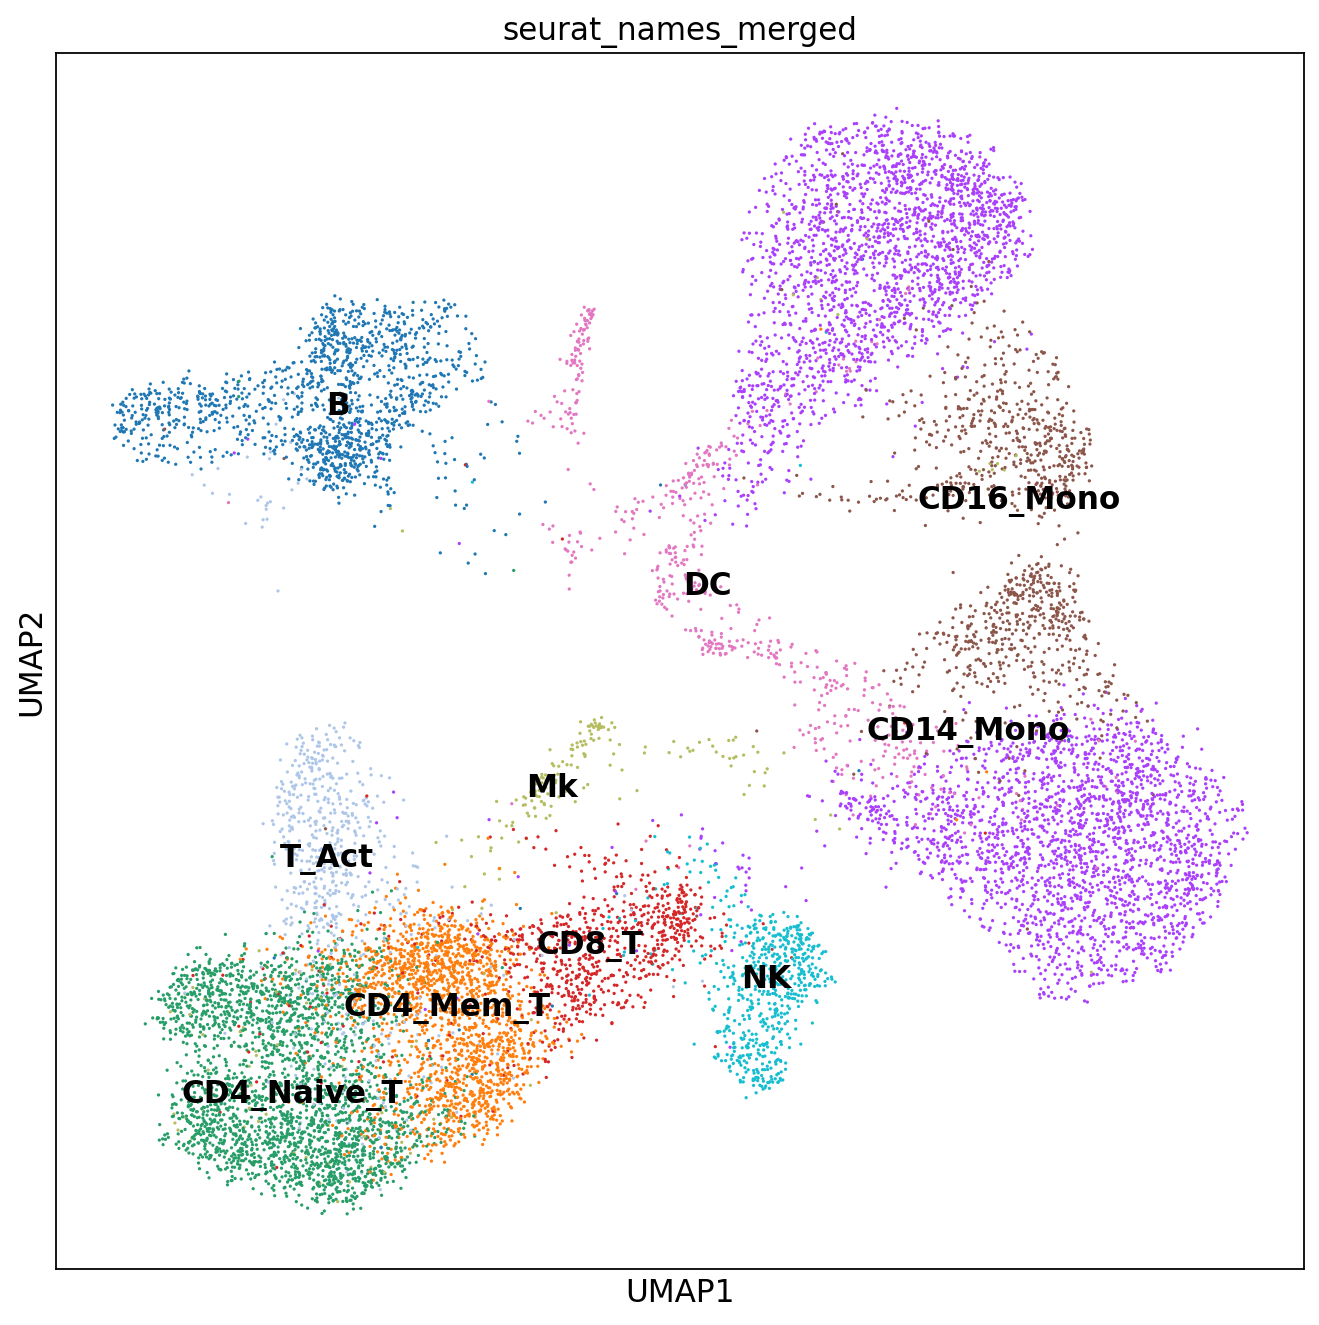

In [49]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='seurat_names_merged', legend_loc='on data')


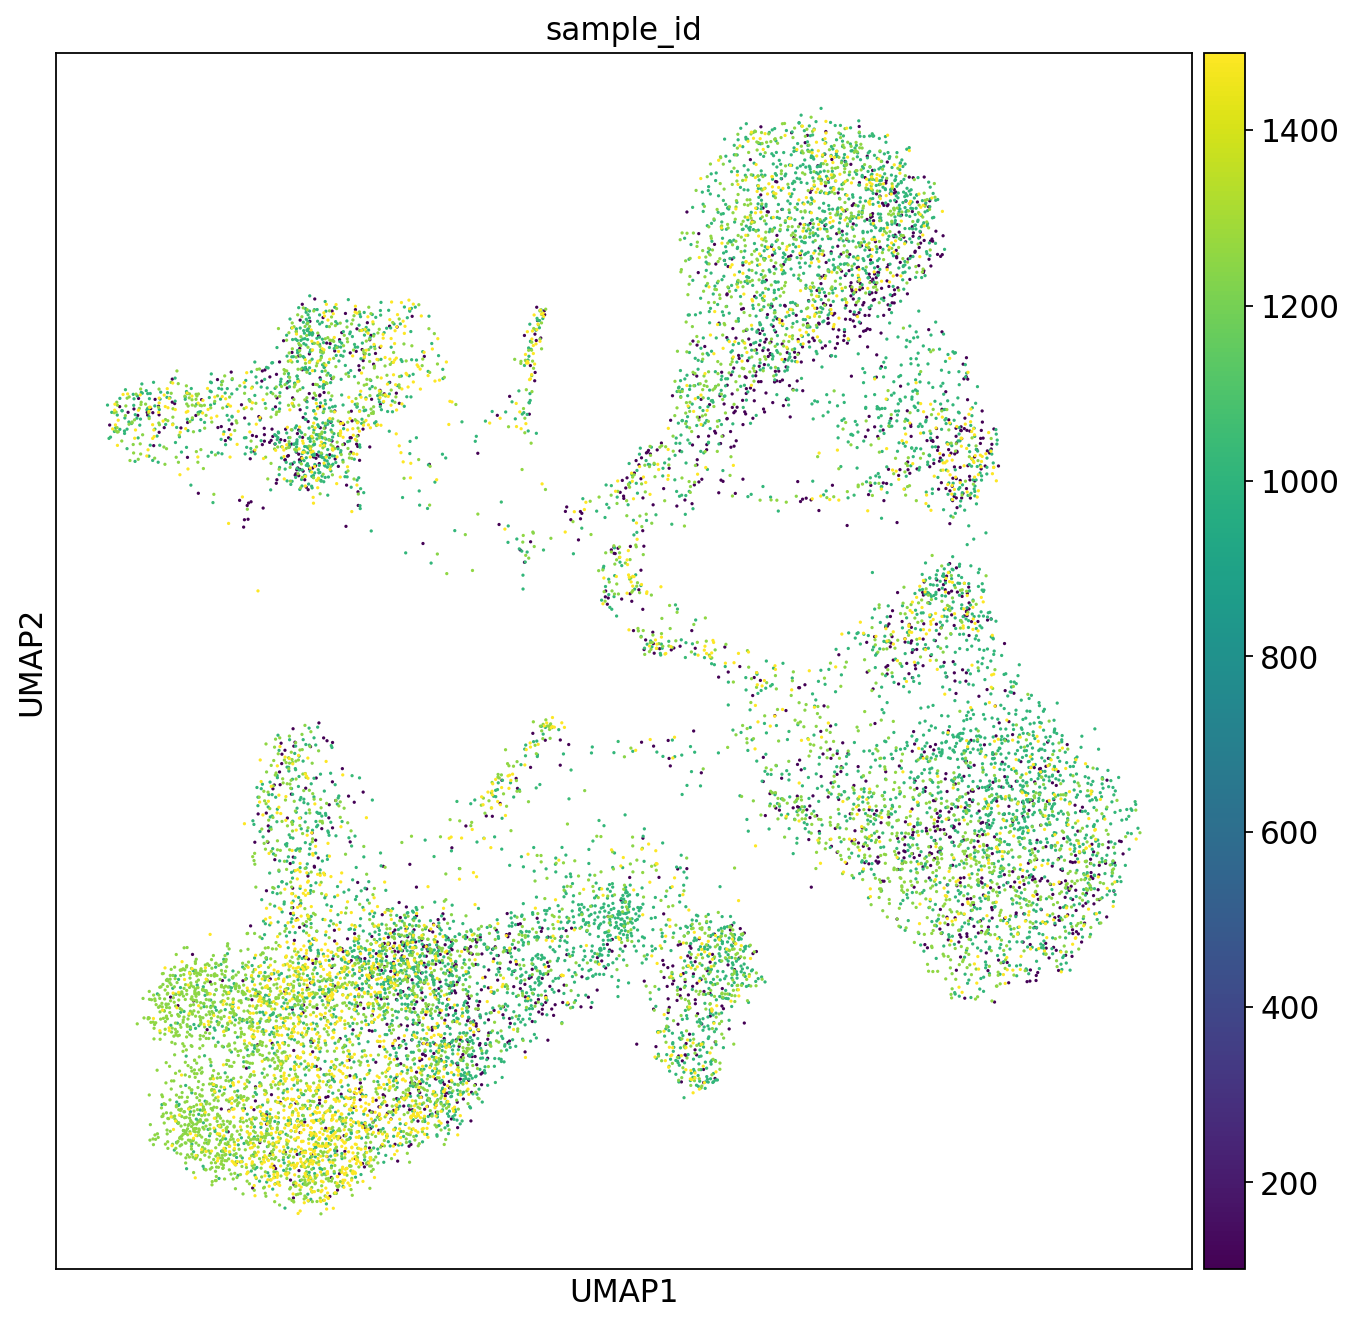

In [47]:
# plot by sample id
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='sample_id', legend_loc='on data')


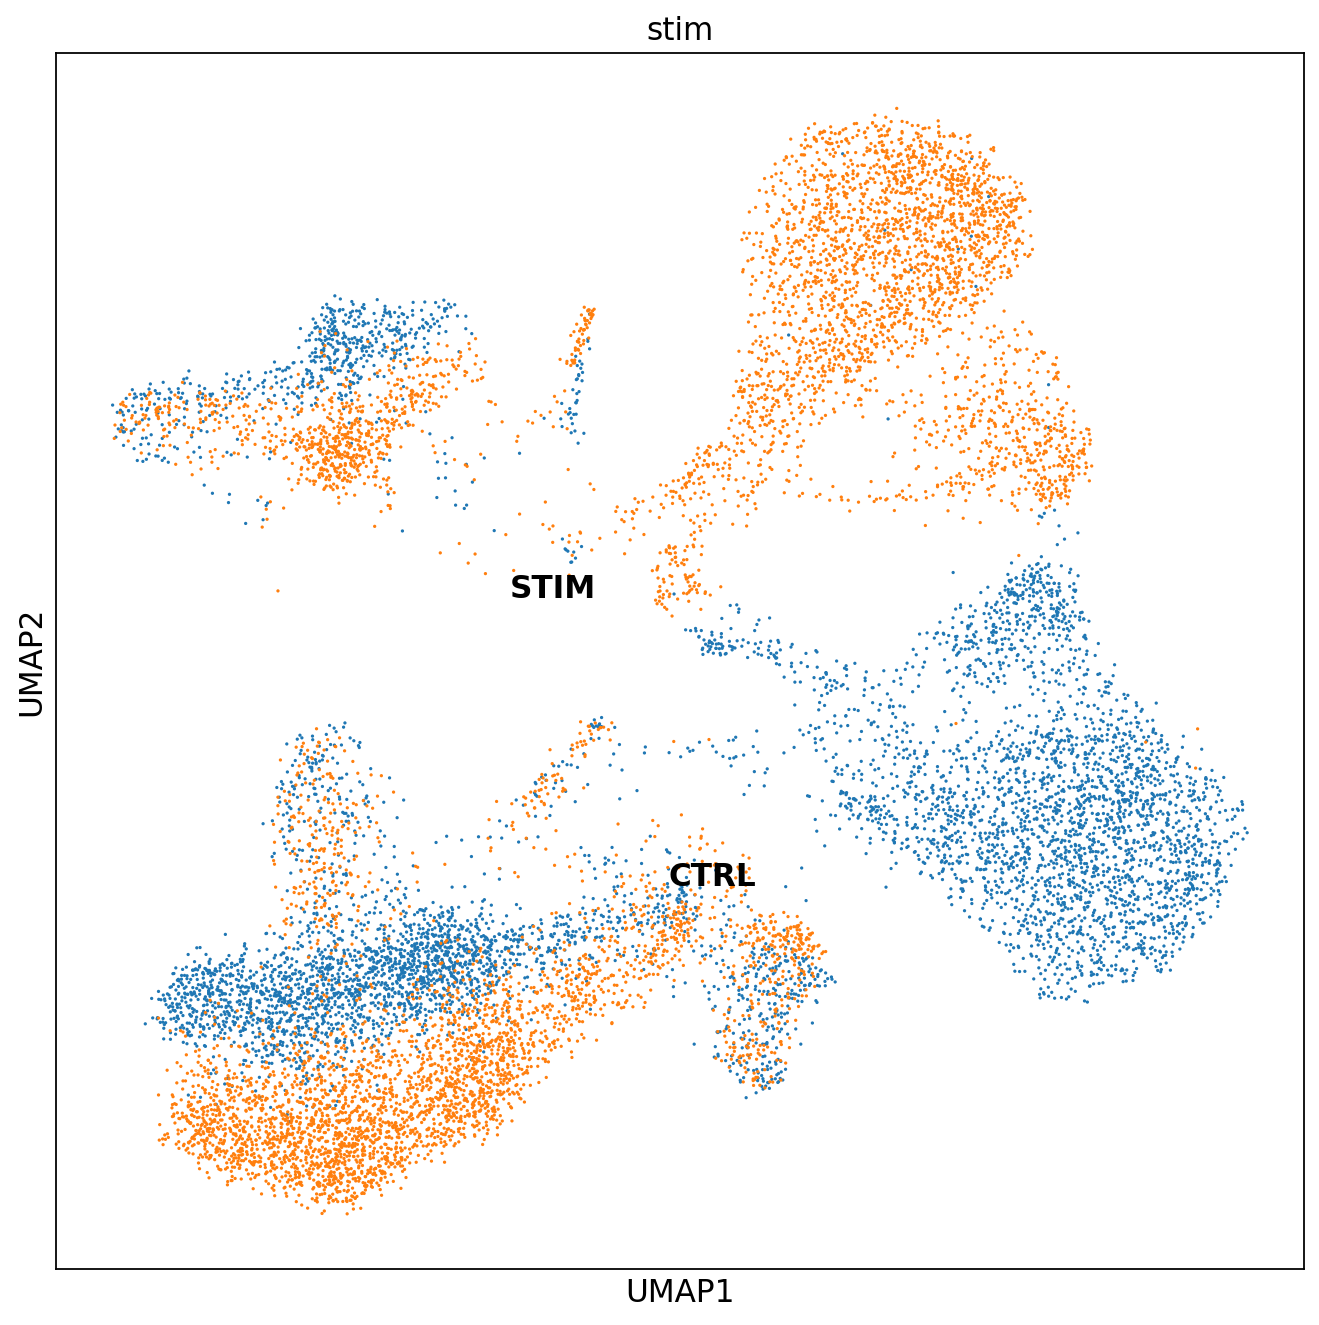

In [48]:
# plot by stimulation
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='stim', legend_loc='on data')
